# Show and save gt

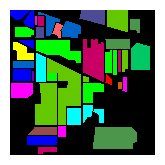

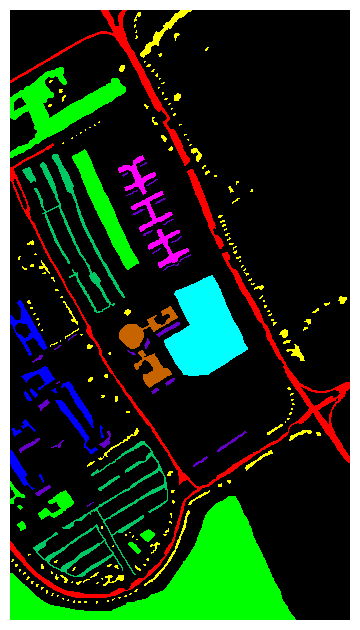

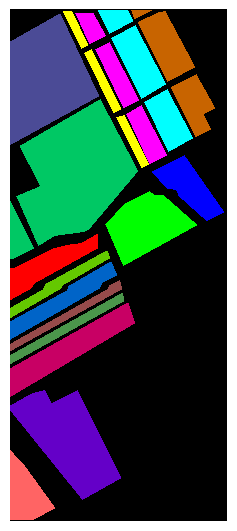

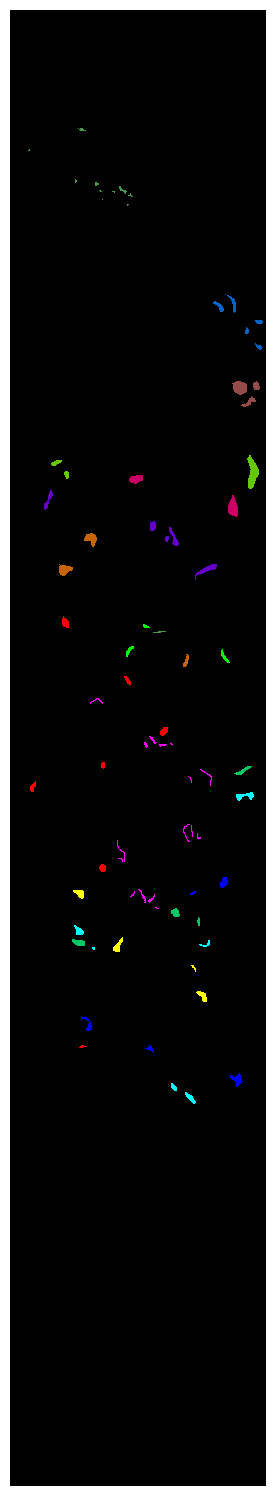

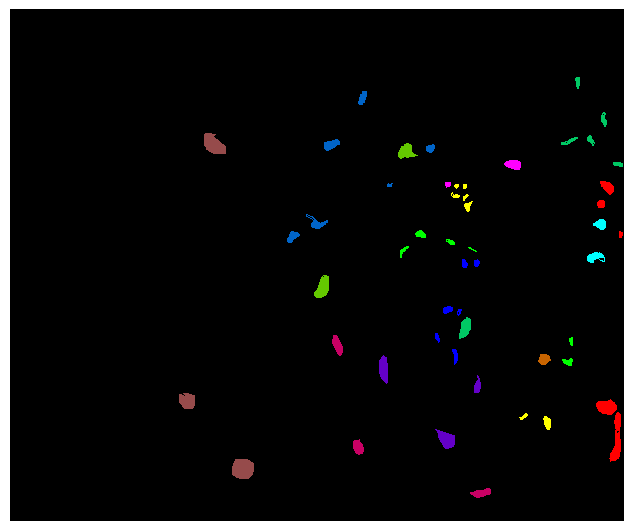

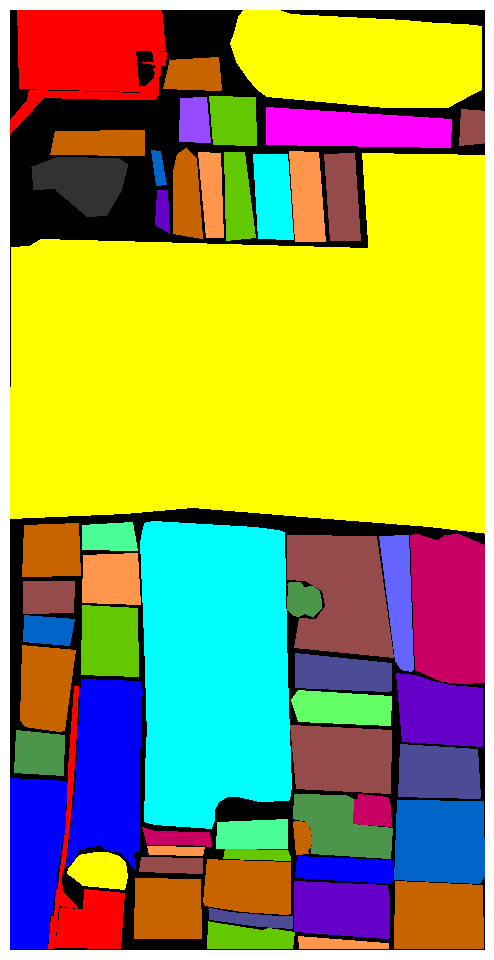

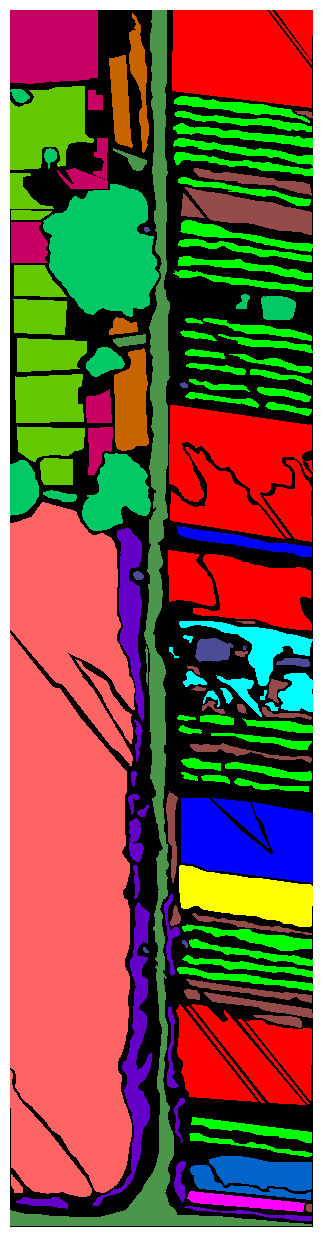

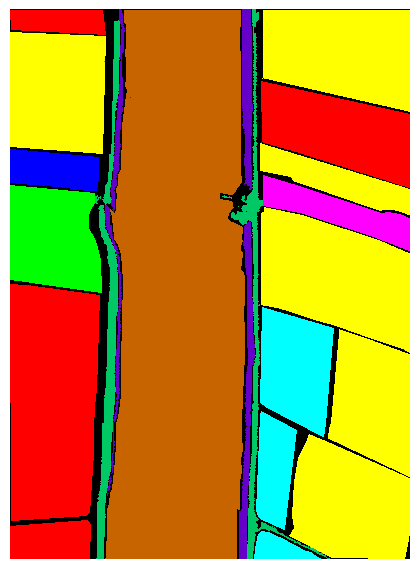

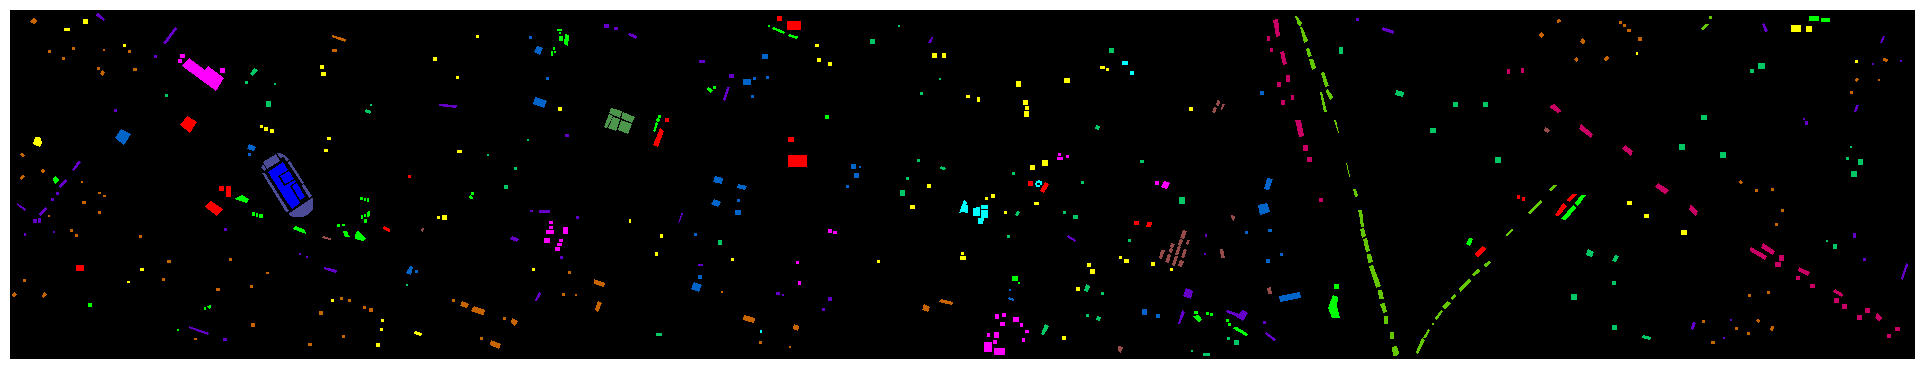

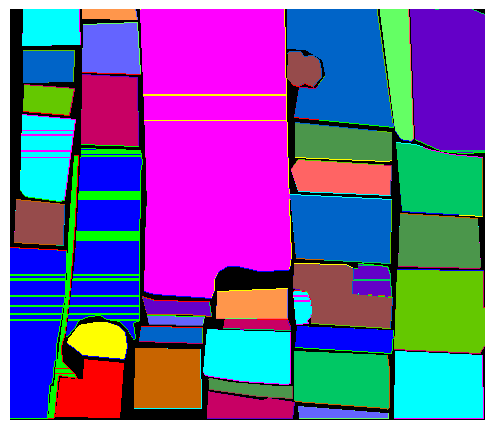

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import spectral as spy
import scipy.io as scio

def Draw_Classification_Map(gt, name: str, scale: float = 4.0, dpi: int = 400):
    '''
    get classification map , then save to given path
    :param gt: classification gt, 2D
    :param name: saving path and file's name
    :param scale: scale of image. If equals to 1, then saving-size is just the label-size
    :param dpi: default is OK
    :return: null
    '''
    fig, ax = plt.subplots()
    numlabel = np.array(gt)
    v = spy.imshow(classes=numlabel.astype(np.int16), fignum=fig.number)
    ax.set_axis_off()   # 不显示坐标轴
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False) # 去除边缘空白
    # 设置图片大小
    fig.set_size_inches(gt.shape[1] * scale / dpi, gt.shape[0] * scale / dpi)
    foo_fig = plt.gcf()  # 'get current figure'
    plt.gca().xaxis.set_major_locator(plt.NullLocator()) # 不要坐标轴刻度
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    foo_fig.savefig(name + '.png', format='png', transparent=True, dpi=dpi, pad_inches=0)
    pass

IP_gt = scio.loadmat('/home/cj/HSI/Datasets/IP/Indian_pines_gt.mat')['groundT']
Draw_Classification_Map(IP_gt, './gt_map/IP_gt')

PU_gt = scio.loadmat('/home/cj/HSI/Datasets/PU/PaviaU_gt.mat')['groundT']
Draw_Classification_Map(PU_gt, './gt_map/PU_gt')

SA_gt = scio.loadmat('/home/cj/HSI/Datasets/SA/Salinas_gt.mat')['groundT']
Draw_Classification_Map(SA_gt, './gt_map/SA_gt')

BS_gt = scio.loadmat('/home/cj/HSI/Datasets/BS/Botswana_gt.mat')['groundT']
Draw_Classification_Map(BS_gt, './gt_map/BS_gt')

KSC_gt = scio.loadmat('/home/cj/HSI/Datasets/KSC/KSC_gt.mat')['groundT']
Draw_Classification_Map(KSC_gt, './gt_map/KSC_gt')

HongHu_gt = scio.loadmat('/home/cj/HSI/Datasets/HongHu/HongHu_gt.mat')['groundT']
Draw_Classification_Map(HongHu_gt, './gt_map/HongHu_gt')

HanChuan_gt = scio.loadmat('/home/cj/HSI/Datasets/HanChuan/HanChuan_gt.mat')['groundT']
Draw_Classification_Map(HanChuan_gt, './gt_map/HanChuan_gt')

LongKou_gt = scio.loadmat('/home/cj/HSI/Datasets/LongKou/LongKou_gt.mat')['groundT']
Draw_Classification_Map(LongKou_gt, './gt_map/LongKou_gt')

Houston_gt = scio.loadmat('/home/cj/HSI/Datasets/Houston/Houston_gt.mat')['groundT']
Draw_Classification_Map(Houston_gt, './gt_map/Houston_gt')

HongHu_corpped_gt = scio.loadmat('/home/cj/HSI/Datasets/HongHu/HongHu_cropped_gt.mat')['groundT']
Draw_Classification_Map(HongHu_corpped_gt, './gt_map/HongHu_corpped_gt')

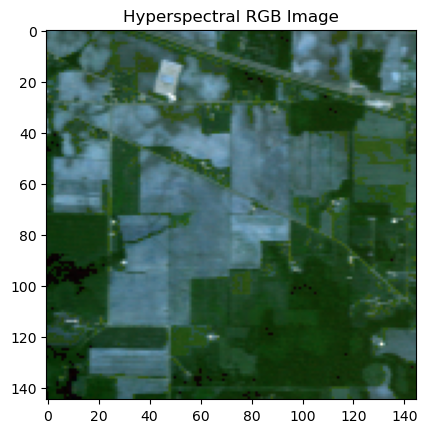

选定的波段： {'blue': 7, 'green': 14, 'red': 25}


In [5]:
import spectral
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

def process_and_save_hyperspectral_image(data_path, save_path):
    """加载高光谱数据，显示并保存RGB图像"""
    # 加载数据
    data = loadmat(data_path)
    img = data['data']  # 根据键名加载图像数据
    img = img.astype(np.float32)
    
    # AVIRIS传感器的波长范围
    wavelengths = np.linspace(400, 2500, img.shape[2])  # 波长范围从400到2500nm，假设数据有 img.shape[2] 个波段
    
    # 定义目标波长
    target_wavelengths = {'blue': 470, 'green': 550, 'red': 660}
    
    # 计算最接近的波段索引
    bands = {color: np.argmin(np.abs(wavelengths - target)) for color, target in target_wavelengths.items()}
    
    # 提取RGB波段
    rgb_bands = [bands['blue'], bands['green'], bands['red']]
    rgb_image = spectral.get_rgb(img, rgb_bands)
    
    # 显示RGB图像
    plt.imshow(rgb_image)
    plt.title("Hyperspectral RGB Image")
    plt.show()
    
    # 保存RGB图像
    plt.imsave(save_path, rgb_image)
    
    # 输出选定的波段
    print("选定的波段：", bands)

# 示例使用
data_name = 'indian_pines_corrected'
data_path = '/home/cj/HSI/Datasets/IP/Indian_pines.mat'  # 请更改为你的实际路径
save_path = f'./rgb_image/{data_name}.png'  # 请更改为你想保存的路径
process_and_save_hyperspectral_image(data_path, save_path)
